In [2]:
# Salary Trends Based on Geographic Location: "What are the trends in salaries for data science professionals across different regions or cities?"

In [15]:
# import
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as stats

In [4]:
# CSV Path
csvpath = Path('salaries.csv')

# Creating DataFrame of csv data
geoLocDF = pd.read_csv(csvpath)

In [5]:
geoLocDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8108,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8109,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8110,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8111,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [11]:
geoLocDF['company_location'].value_counts(ascending=True)

company_location
MT       1
BA       1
AM       1
HK       1
ZA       1
      ... 
DE      72
ES     108
CA     181
GB     403
US    6941
Name: count, Length: 73, dtype: int64

In [13]:
# Generating summary statistics table
countryData = geoLocDF.groupby(['company_location'])

countryMean = countryData['salary_in_usd'].mean()
countryMed = countryData['salary_in_usd'].median()
countryVar = countryData['salary_in_usd'].var()
countryStD = countryData['salary_in_usd'].std()
countrySEM = countryData['salary_in_usd'].sem()

countryDF = pd.DataFrame({
    'Salary(USD) Mean': countryMean,
    'Salary(USD) Median': countryMed,
    'Salary(USD) Variance': countryVar,
    'Salary(USD) Std. Dev': countryStD,
    'Salary(USD) Std. Err.': countrySEM
})

countryDF

,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
company_location,,,,,
AD,50745.000000,50745.0,NaN,NaN,NaN
AE,100000.000000,115000.0,9.250000e+08,30413.812651,17559.422921
AM,50000.000000,50000.0,NaN,NaN,NaN
AR,62000.000000,60000.0,1.920000e+08,13856.406461,6196.773354
AS,34026.500000,34026.5,5.103054e+08,22589.940339,15973.500000
...,...,...,...,...,...
TH,22971.333333,24613.0,5.315095e+07,7290.469967,4209.154798
TR,22313.600000,20171.0,1.628573e+07,4035.558611,1804.756676
UA,121333.333333,84000.0,7.586667e+09,87101.473390,35559.027608


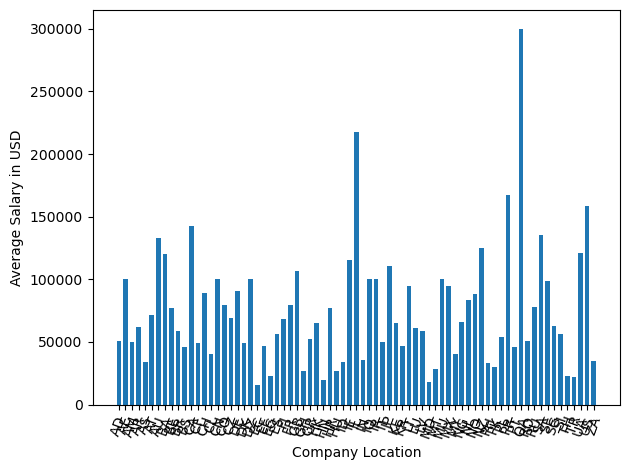

In [38]:
barChart = countryDF.sort_values(by=['Salary(USD) Mean'], ascending=False)
plt.bar(countryDF.index, countryDF['Salary(USD) Mean'])
plt.ylabel('Average Salary in USD')
plt.xlabel('Company Location')
plt.xticks(rotation= 70)
plt.tight_layout()
plt.show()

